In [ ]:
HEART DISEASE PREDICTION MODEL

In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image

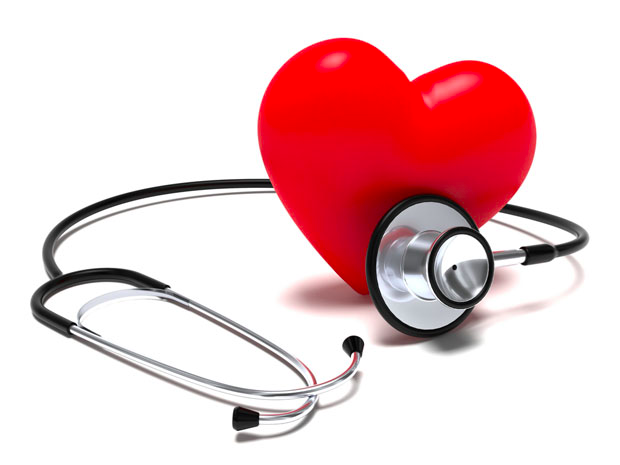

In [142]:
Image(filename='C:/Users/SOURAV/Desktop/python/Predicting-Heart-Disease-master/Predicting-Heart-Disease-master/image89.png',width=800,height=200)

In [57]:
df=pd.read_csv('dataset.csv')

In [58]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [59]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [60]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


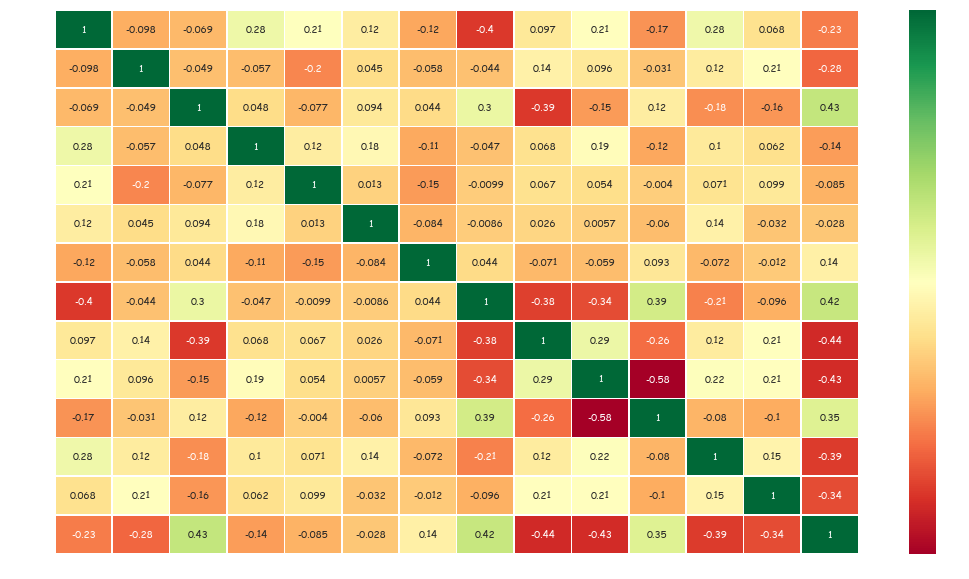

In [61]:
plt.figure(figsize=(18,10))
sb.heatmap(df.corr(),annot=True,linewidth=0.5,cmap='RdYlGn')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002964EAE19C8>]],
      dtype=object)

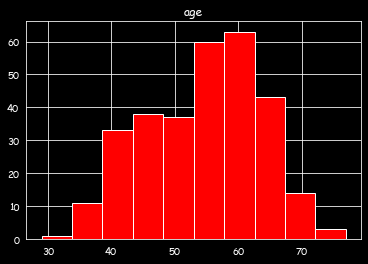

In [62]:
plt.style.use('dark_background')
df.hist('age',color='red')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002964EE62F88>]],
      dtype=object)

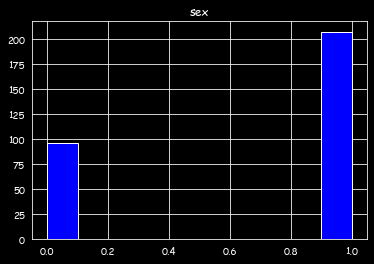

In [63]:
plt.style.use('dark_background')
df.hist('sex',color='blue')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002964EEE4748>]],
      dtype=object)

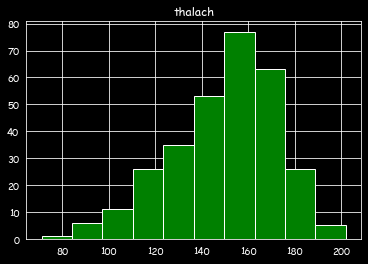

In [64]:
plt.style.use('dark_background')
df.hist('thalach',color='green')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002964EF67CC8>]],
      dtype=object)

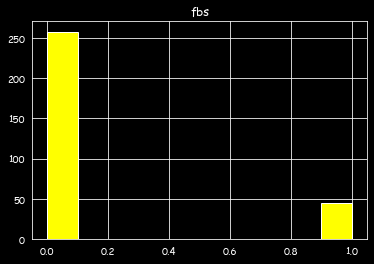

In [65]:
plt.style.use('dark_background')
df.hist('fbs',color='yellow')

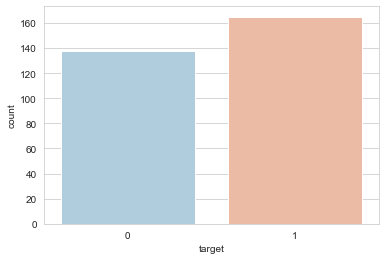

In [66]:
sb.set_style('whitegrid')
sb.countplot('target',data=df,palette='RdBu_r')

In [67]:
dataset=pd.get_dummies(df,columns=['sex','cp','fbs','restecg','exang','slope','ca','thal'])

In [68]:
dataset

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,123,0.2,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
299,45,110,264,132,1.2,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
300,68,144,193,141,3.4,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,1
301,57,130,131,115,1.2,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,1


In [69]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 31 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        303 non-null    int64  
 1   trestbps   303 non-null    int64  
 2   chol       303 non-null    int64  
 3   thalach    303 non-null    int64  
 4   oldpeak    303 non-null    float64
 5   target     303 non-null    int64  
 6   sex_0      303 non-null    uint8  
 7   sex_1      303 non-null    uint8  
 8   cp_0       303 non-null    uint8  
 9   cp_1       303 non-null    uint8  
 10  cp_2       303 non-null    uint8  
 11  cp_3       303 non-null    uint8  
 12  fbs_0      303 non-null    uint8  
 13  fbs_1      303 non-null    uint8  
 14  restecg_0  303 non-null    uint8  
 15  restecg_1  303 non-null    uint8  
 16  restecg_2  303 non-null    uint8  
 17  exang_0    303 non-null    uint8  
 18  exang_1    303 non-null    uint8  
 19  slope_0    303 non-null    uint8  
 20  slope_1   

In [70]:
scaler=StandardScaler()

In [73]:
column_to_scale=['age','trestbps','chol','thalach','oldpeak']

In [76]:
dataset[column_to_scale]=scaler.fit_transform(dataset[column_to_scale])
dataset

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,0.478391,-0.101730,-1.165281,-0.724323,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
299,-1.033002,-1.234996,0.342756,-0.771706,0.138373,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
300,1.503641,0.706843,-1.029353,-0.378132,2.036303,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,1
301,0.290464,-0.092738,-2.227533,-1.515125,0.138373,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,1


In [81]:
x=dataset.drop(['target'],axis=1)
y=dataset['target']


In [ ]:
#################     KNN CLASSIFIER       #########################

In [82]:
knn_classifier=KNeighborsClassifier(n_neighbors=12)

In [85]:
score=cross_val_score(knn_classifier,x,y,cv=10)

In [86]:
score.mean()

0.8448387096774195

In [87]:
knn=[]
for i in range(1,21):
    knn_classifier=KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn_classifier,x,y,cv=10)
    knn.append(score.mean())

Text(0.5, 1.0, 'Heart Disease Prediction Using KNN algorithm')

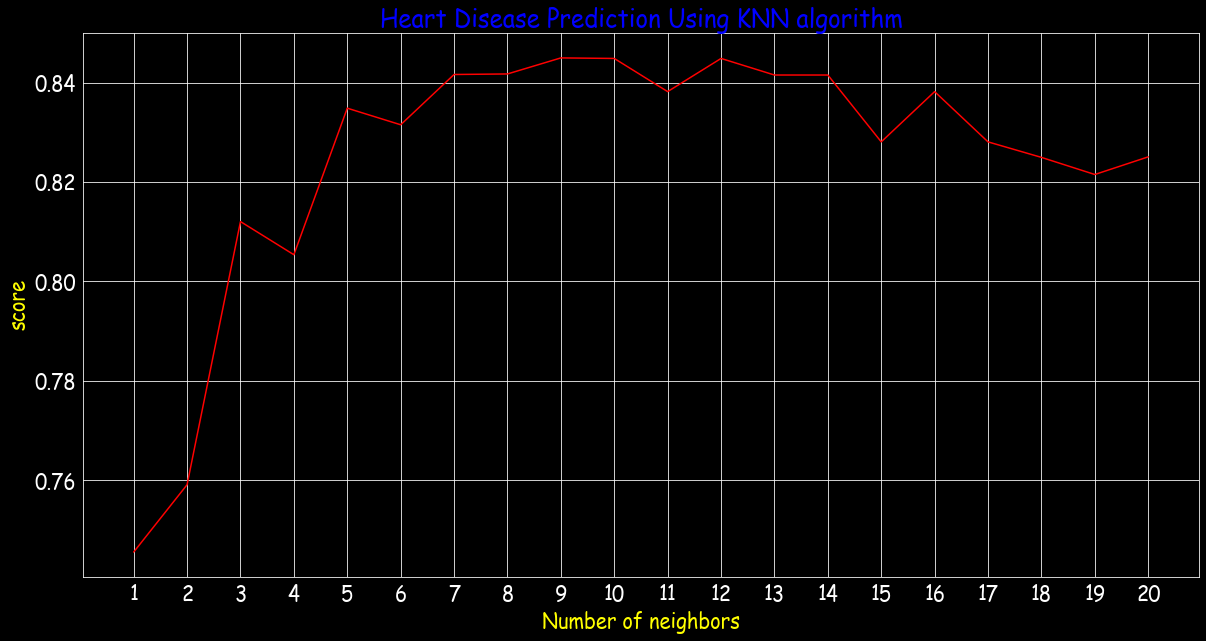

In [112]:
plt.style.use('dark_background')
matplotlib.rcParams['font.size']=20
matplotlib.rcParams['font.family']='fantasy'
plt.figure(figsize=(20,10))
plt.plot([k for k in range(1,21)],knn,color='red')
#for i in range(1,21):
#    plt.text(i, knn[i-1], (i, knn_scores[i-1]))
plt.xlabel('Number of neighbors',color='yellow')
plt.xticks([i for i in range(1, 21)])
plt.ylabel('score',color='yellow')
plt.title('Heart Disease Prediction Using KNN algorithm',color='blue')

In [93]:
matplotlib.rcParams

C:\Users\SOURAV\anaconda3\lib\site-packages\IPython\lib\pretty.py:695: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  output = repr(obj)


RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': True,
          'axes.edgecolor': 'white',
          'axes.facecolor': 'black',
          'axes.formatter.limits': [-7, 7],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.for

In [ ]:
###################     RANDOM FOREST CLASSIFIER       #################

In [118]:
randomscaler=RandomForestClassifier(n_estimators=10)
score=cross_val_score(randomscaler,x,y,cv=10)

In [119]:
score.mean()

0.8148387096774193

In [120]:
random=[]
for i in range(1,21):
    randomscaler=RandomForestClassifier(n_estimators=i)
    score=cross_val_score(randomscaler,x,y,cv=10)
    random.append(score.mean())

([<matplotlib.axis.XTick at 0x2965532e608>,
 <a list of 20 Text xticklabel objects>)

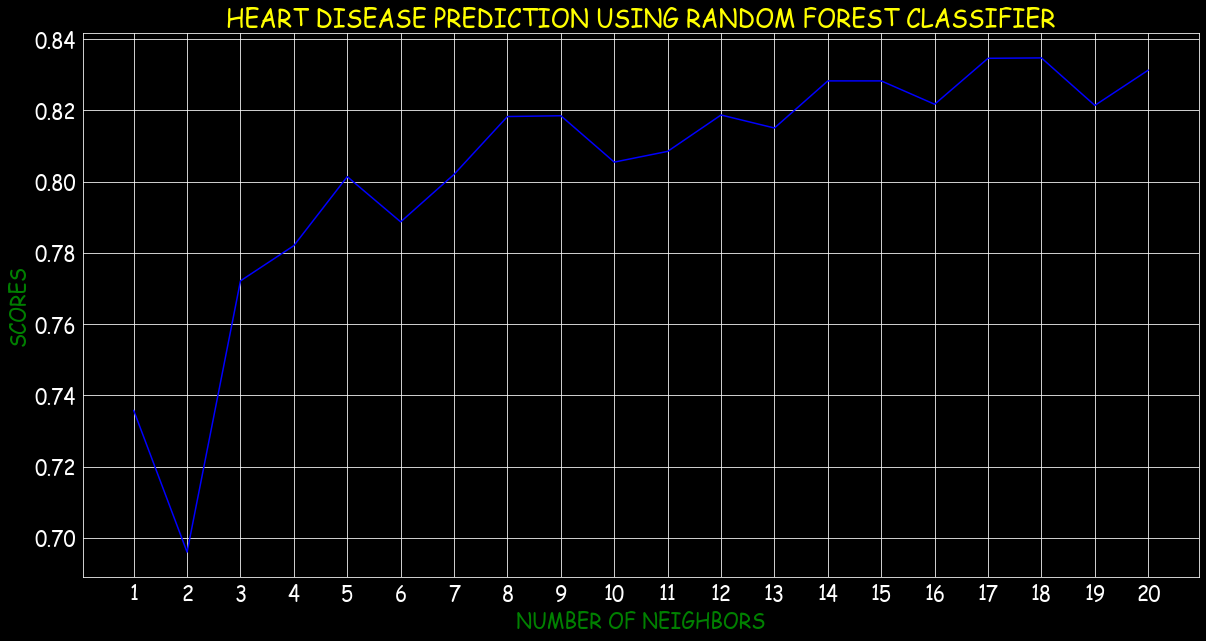

In [129]:
plt.figure(figsize=(20,10))
plt.plot([k for k in range(1,21)],random,color='blue')
plt.xlabel('NUMBER OF NEIGHBORS',color='green')
plt.ylabel('SCORES',color='green')
plt.title('HEART DISEASE PREDICTION USING RANDOM FOREST CLASSIFIER',color='yellow')
plt.xticks([i for i in range(1,21)])